# Predicting Loan Defaulters

#### Problem:
In  the  CSV  file  that  accompanies  this  document  are  a  set  of  loans  issued  between October 2014 and September 2015.  The performance of these loans has beenobserved through October 2015.As of October 2015, each loan was marked (in the column loan status) as "Current", "Fully Paid", or "Charged Off".  "Current" means that the borrower is either on or ahead of schedule in terms of paying off his or her loan.  "Fully Paid" meansthat the loan has been entirely paid off.  "Charged Off" means that the borrower has stopped paying and defaulted on the loan. In addition to loan status, other variables included in the dataset are a uniquemember  id,  loan  amount,  interest  rate,  the  date  the  loan  was  issued,  lower  and upper endpoints of the range of the borrower's FICO score, annual income, and the date of the last payment that was made by the borrower.

### What is the relationship between FICO score and interest rate?

Observations:
 -  There is a negative correlation between Fico score and interest rate. As the fico score increases, the rate of interest drops.
 
![title](ficovsint.png)

### What is the relationship between loan size and interest rate?

Observations:
 -  Interest rate band of 20% - 25%
  -  Dense for loan amount below 10k, becomes less dense 10k to 20k and beyond 20k is very sparse.
 -  Interest rate band of 10% - 20%
  -  Dense for loan upto 25k, and becomes sparse beyond that
 -  Interest rate band 5% - 10%
  -  Sparse upto 5k, then dense from 5k to 15k. Becomes less dense after that, trailing off after 30k
  
Inference:
 -  Lower loan amounts usually involve multiple checks on the borrower, and the interest rate varies depending on these factors. Loan amounts of upto 15k are almost always sanctioned, with an interest rate based on the borrower's background. This is evident from the graph having most loan concentration in the 0-15k loan amount and 10%-20% interest rate range. On the other hand, higher loans amounts above 20k, are not sanctioned at all until extensive background checks are passed. Hence, the lower concentration in that area.
 -  A ~25% interest rate on loans is uncommon, since few borrowers would pick up such a loan. That explains the sparsity of this interest bracket as compared to the others. 
 -  Similarly, borrowers awarded a 5% interest rate, would be those with a high income/high fico. Most of these borrowers seem to pick up loans 5k - 15k. But the overall number of borrowers would be fewer as compared to other interest brackets.
 
![title](amtvsint.png)

Not surprising that a borrowers FICO score affects the relationship between loan amount and interest rate. Here is a graph depicting this.

In [10]:
%%HTML
<div class='tableauPlaceholder' id='viz1511640852541' style='position: relative'><noscript><a href='#'><img alt='Loan Amt : Interest Rate&#47; FICO ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;KF&#47;KFTKGDRP8&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='path' value='shared&#47;KFTKGDRP8' /> <param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;KF&#47;KFTKGDRP8&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1511640852541');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.60)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

The above is a plot of Loan amount vs Interest rates, based on FICO scores. For visibility, FICO scores have been binned with 50 points in each bin.
Clicking on the legend (Avg fico(bin)) will filter data points for each bin. 

Observations:
 -  Increase in FICO sees a decrease in number of loans
 -  Increase in FICO also sees a decrease in the interest rate
 
Inference:
 -  Higher the FICO, lesser the requirement for loans. Low FICO scorers borrow many more loans than high FICO scorers.
 -  Higher the FICO, more reliable the borrower. Irrespective of loan amount, he gets awarded a low interest rate.
 -  Similarly, lower FICO borrowers are majorly awarded lower amount loans with hiher interest rates.
 
 
### Does it seem like the size of a loan and/or the borrower's FICO score are related to whether or not the loan ends up being charged off?  How might this relate to your answer to the previous question?

Looking first at the relationship of Loan Amount to Loan Status. We need to find if the loan amount influences the charge off ratio. To do this, we first bin the loan amounts into $5k bins each. Then we find the ratio of the count(loans that charged off)/count(all loans) for each bin. The same calculation has been repated for the sum amount of loans in each bin.

Observations:
 -  The ratio seems to be almost constant over all bins
 -  Even though a small difference, the ratio of charged off loans drops consistently, and is lowest at $20k loans before increasing again.

 
Inference:
 -  The charge off rate across all bins is almost the same
 -  Interestingly very low amount and very high amount loans have the same percentage of getting charged off. This may indicate that more checks/security is required for loans of these amounts.
However, It is difficult to conclude if this is an actual trend, due to lack of data for the other loan amounts. 

![title](percentsChargeOff.png)

Now, lets's examine the relationship between FICO score and Loan Status. Using the same graph as above, I now factored in the FICO score of borrowers. 


In [14]:
%%HTML
<div class='tableauPlaceholder' id='viz1511677529070' style='position: relative'><noscript><a href='#'><img alt='% Charged Off : FICO ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Up&#47;UpstartChallenge&#47;ChargedOffFICO&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='UpstartChallenge&#47;ChargedOffFICO' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Up&#47;UpstartChallenge&#47;ChargedOffFICO&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1511677529070');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

Observations:
 -  Borrowers with FICO score 850+ default 33.3% on loans valued $15k-$20k, but charge off 0% on other loans
 -  Borrowers with FICO score 750-800 default the least
 -  As FICO score increases, percentage of charge offs decrease, except for anomaly just observed
 
Inference:
 -  The data seems to show that every 1 in 3 borrowers with FICO 850+ will charge off!! Its very interesting that high FICO scorers would have high charge off rates, especially for just one bracket of loan amount. However, there seems to be no other data to support the same. Upon closer inspection of the data, (shown below) I found that the number of FICO 850+ borrowers who borrowed loans between 15k and 20k are 3, and 1 charged off.
 
Obviously, this is too small a set to make any conclusions, and so the previous inference can be discarded. For a clearer picture, I plotted the FICO score bins with the count of loans that were charged off. Click on the legend to display only the charged off loans.

Observations:
 -  As FICO score increases, number of charged off loans decreases drastically, trailing off to close to 0 aroound 750+ FICO scores.
 
Inference:
 - This makes more sense, and is what is expected. However, it still holds that the dataset is too small to make a solid conclusion.

In [18]:
%%HTML
<div class='tableauPlaceholder' id='viz1511679526430' style='position: relative'><noscript><a href='#'><img alt='FICO : Loan Status ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Up&#47;UpstartChallenge&#47;FICOLoanStatus&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='UpstartChallenge&#47;FICOLoanStatus' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Up&#47;UpstartChallenge&#47;FICOLoanStatus&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1511679526430');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.60)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

### What percentage of loans have been charged off as of October 2015?
The total number of loans present in October 2015 are 221,043. 7 loans were charged off. Thats 0.003%.

### Some of the loans which are marked "Current" in October 2015 will endup being charged off before they are paid in full.  Using the fact that all of these loans are 3 years in length, estimate the probability that a randomly chosen loan would eventually become charged off,  possibly after October 2015.  Be sure to explain any assumptions you make.

In [56]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_curve,average_precision_score
from sklearn.metrics import confusion_matrix, classification_report

#import the data
loan = pd.read_excel('upstartloan_data.xlsx')
print(loan.columns)
loan.

Index(['member_id', 'loan_amnt', 'int_rate', 'issue_d', 'loan_status',
       'fico_range_low', 'fico_range_high', 'annual_inc', 'last_pymnt_d'],
      dtype='object')


In [57]:
# For accurate prediction, we filter out columns that are irrelevant or see into the future
# Columns to eliminate: member_id(irrelevant), 'issue_d'(not enough dta in this set to use), 'last_
loan = loan[['loan_amnt', 'int_rate',
       'fico_range_low', 'fico_range_high', 'annual_inc', 'loan_status']]

# Combine high and low FICO scores into an average score and drop original columns
loan['avg Fico'] = (loan['fico_range_low'] + loan['fico_range_high'])/2
cols_to_drop = ['fico_range_low','fico_range_high']
loan.drop(cols_to_drop,axis = 1, inplace=True)
loan.head()

,loan_amnt,int_rate,annual_inc,loan_status,avg Fico
0,18000,0.0917,150000.0,Fully Paid,702.0
1,14000,0.1167,135000.0,Current,672.0
2,8400,0.0917,75000.0,Current,667.0
3,10000,0.0769,94000.0,Current,732.0
4,2000,0.1299,150000.0,Current,682.0


In [75]:
loan['loan_status'].value_counts()
16484/(1683+16484)

0.9073594979908626

In [58]:
# Our ultimate goal is to predict which loans will be fully paid and which ones will be charged off. The loans that are 'Current'
# will not help us predict this, as they give no usable information. So we eliminate these records from the dataset

loan = loan[(loan['loan_status'] == 'Fully Paid') | (loan['loan_status'] == 'Charged Off')]
loan.reset_index(inplace=True)
loan.drop('index', axis=1, inplace=True)
loan.head()

#Info about the dataset
loan['loan_status'].value_counts()
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18167 entries, 0 to 18166
Data columns (total 5 columns):
loan_amnt      18167 non-null int64
int_rate       18167 non-null float64
annual_inc     18167 non-null float64
loan_status    18167 non-null object
avg Fico       18167 non-null float64
dtypes: float64(3), int64(1), object(1)
memory usage: 709.7+ KB


In [59]:
# We want to replace the loan status objects with numbers that denote the same information. We map Fully Paid to 0 and
# Charged Off to 1.
mapping_dictionary = {"loan_status":{ "Fully Paid": 0, "Charged Off": 1}}
loan = loan.replace(mapping_dictionary)
loan.head()

#shuffle the data to minimize over/underfitting
loan = loan.sample(frac=1).reset_index(drop=True)

In [60]:
# Divide data into features and target
Xs = loan.drop('loan_status', 1).values
y = loan['loan_status'].values

# Generate training and test sets
Xs_train, Xs_test, y_train, y_test = train_test_split(Xs, y, test_size=0.2, random_state=42)

In [67]:
#Using a Random Forest classifier to predict loan status
RF = RandomForestClassifier(n_estimators=500)
RF.fit(Xs_train, y_train)
y_pred = RF.predict(Xs_test)
print('Test score: {:.2f}'.format(RF.score(Xs_test, y_test)))
print("Confusion matrix:\n%s" % confusion_matrix(y_test, y_pred))
print("Classification report for Random Forest classifier %s:\n%s\n"
      % (RF, classification_report(y_test, y_pred)))
print("-------------------------------------------")
'''confmat = confusion_matrix(y_test, y_pred)
FP = confmat.sum(axis=0) - np.diag(confmat)  
FN = confmat.sum(axis=1) - np.diag(confmat)
TP = np.diag(confmat)
TN = confmat.values.sum() - (FP + FN + TP)

# Sensitivity, hit rate, recall, or true positive rate
print("Sensitivity is : ")
TPR = TP/(TP+FN)
# Specificity or true negative rate
print("Specificity is : ")
TNR = TN/(TN+FP)'''

Test score: 0.90
Confusion matrix:
[[3253   35]
 [ 335   11]]
Classification report for Random Forest classifier RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=500, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False):
             precision    recall  f1-score   support

          0       0.91      0.99      0.95      3288
          1       0.24      0.03      0.06       346

avg / total       0.84      0.90      0.86      3634


-------------------------------------------


'confmat = confusion_matrix(y_test, y_pred)\nFP = confmat.sum(axis=0) - np.diag(confmat)  \nFN = confmat.sum(axis=1) - np.diag(confmat)\nTP = np.diag(confmat)\nTN = confmat.values.sum() - (FP + FN + TP)\n\n# Sensitivity, hit rate, recall, or true positive rate\nprint("Sensitivity is : ")\nTPR = TP/(TP+FN)\n# Specificity or true negative rate\nprint("Specificity is : ")\nTNR = TN/(TN+FP)'

We got an accuracy of 90%! But looking atthe confusion matrix we see that out of 346 charged off loans, only 11 were predicted correctly. That's not a great model. The reason for this is possibly because of the imbalance in the data. There are 1683 charged off loans 9.3% of the total data and 16484 fully paid loans in the data at 90.7%. 
Accuracy usually doesn't do a good job at evaluating performance over imbalanced datasets. Instead, we'll use AUC to evaluate the model. The AUC curve has been drawn below.


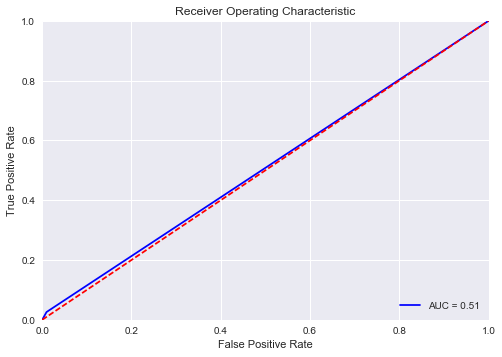

In [64]:
from sklearn import metrics
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

There's a lot of room for improvement, evident from this curve. One technique commonly used is to upsample the data to crete a more balanced dataset. We can achieve this using SMOTE. 

In [5]:
import sklearn
from imblearn.over_sampling import SMOTE 
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 0.18.1.


In [3]:
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state=12, ratio = 1.0)
x_train_res, y_train_res = sm.fit_sample(x_train, y_train)

ImportError: A sklearn version of at least 0.19.0 is required to use imbalanced-learn. 0.18.1 was found. Please upgrade sklearn

In [45]:
from sklearn import neighbors, linear_model
knn = neighbors.KNeighborsClassifier(n_neighbors = 5)
knn_model_1 = knn.fit(Xs_train, y_train)
y_pred = knn_model_1.predict(Xs_test)
print('Test score: {:.2f}'.format(knn_model_1.score(Xs_test, y_test)))
print("Confusion matrix:\n%s" % confusion_matrix(y_test, y_pred))
print("Classification report for KNN classifier %s:\n%s\n"
      % (knn_model_1, classification_report(y_test, y_pred)))

Test score: 0.90
Confusion matrix:
[[3255   40]
 [ 336    3]]
Classification report for KNN classifier KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'):
             precision    recall  f1-score   support

          0       0.91      0.99      0.95      3295
          1       0.07      0.01      0.02       339

avg / total       0.83      0.90      0.86      3634




In [1]:
import sklearn
from imblearn.over_sampling import SMOTE 

ImportError: A sklearn version of at least 0.19.0 is required to use imbalanced-learn. 0.18.1 was found. Please upgrade sklearn